In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('ggplot')

In [6]:
df=pd.read_csv(r"C:\Users\Aayush\Downloads\3. Police Data.csv")
df

stop_date stop_time  country_name driver_gender  driver_age_raw  \
0       1/2/2005      1:55           NaN             M          1985.0   
1      1/18/2005      8:15           NaN             M          1965.0   
2      1/23/2005     23:15           NaN             M          1972.0   
3      2/20/2005     17:15           NaN             M          1986.0   
4      3/14/2005     10:00           NaN             F          1984.0   
...          ...       ...           ...           ...             ...   
65530  12/6/2012     17:54           NaN             F          1987.0   
65531  12/6/2012     22:22           NaN             M          1954.0   
65532  12/6/2012     23:20           NaN             M          1985.0   
65533  12/7/2012      0:23           NaN           NaN             NaN   
65534  12/7/2012      0:30           NaN             F          1985.0   

       driver_age driver_race                   violation_raw  violation  \
0            20.0       White                        Speeding   Speeding   
1            40.0       White                        Speeding   Speeding   
2            33.0       White                        Speeding   Speeding   
3            19.0       White                Call for Service      Other   
4            21.0       White                        Speeding   Speeding   
...           ...         ...                             ...        ...   
65530        25.0       White                        Speeding   Speeding   
65531        58.0       White                        Speeding   Speeding   
65532        27.0       Black  Equipment/Inspection Violation  Equipment   
65533         NaN         NaN                             NaN        NaN   
65534        27.0       White                        Speeding   Speeding   

       search_conducted search_type   stop_outcome is_arrested stop_duration  \
0                 False         NaN       Citation       False      0-15 Min   
1                 False         NaN       Citation       False      0-15 Min   
2                 False         NaN       Citation       False      0-15 Min   
3                 False         NaN  Arrest Driver        True     16-30 Min   
4                 False         NaN       Citation       False      0-15 Min   
...                 ...         ...            ...         ...           ...   
65530             False         NaN       Citation       False      0-15 Min   
65531             False         NaN        Warning       False      0-15 Min   
65532             False         NaN       Citation       False      0-15 Min   
65533             False         NaN            NaN         NaN           NaN   
65534             False         NaN       Citation       False      0-15 Min   

       drugs_related_stop  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
65530               False  
65531               False  
65532               False  
65533               False  
65534               False  

[65535 rows x 15 columns]

In [7]:
df.shape

(65535, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [9]:
df.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [10]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [11]:
# Removing useless column

df=df.drop(columns='country_name')
df = df.drop(columns='search_type')
df

stop_date stop_time driver_gender  driver_age_raw  driver_age  \
0       1/2/2005      1:55             M          1985.0        20.0   
1      1/18/2005      8:15             M          1965.0        40.0   
2      1/23/2005     23:15             M          1972.0        33.0   
3      2/20/2005     17:15             M          1986.0        19.0   
4      3/14/2005     10:00             F          1984.0        21.0   
...          ...       ...           ...             ...         ...   
65530  12/6/2012     17:54             F          1987.0        25.0   
65531  12/6/2012     22:22             M          1954.0        58.0   
65532  12/6/2012     23:20             M          1985.0        27.0   
65533  12/7/2012      0:23           NaN             NaN         NaN   
65534  12/7/2012      0:30             F          1985.0        27.0   

      driver_race                   violation_raw  violation  \
0           White                        Speeding   Speeding   
1           White                        Speeding   Speeding   
2           White                        Speeding   Speeding   
3           White                Call for Service      Other   
4           White                        Speeding   Speeding   
...           ...                             ...        ...   
65530       White                        Speeding   Speeding   
65531       White                        Speeding   Speeding   
65532       Black  Equipment/Inspection Violation  Equipment   
65533         NaN                             NaN        NaN   
65534       White                        Speeding   Speeding   

       search_conducted   stop_outcome is_arrested stop_duration  \
0                 False       Citation       False      0-15 Min   
1                 False       Citation       False      0-15 Min   
2                 False       Citation       False      0-15 Min   
3                 False  Arrest Driver        True     16-30 Min   
4                 False       Citation       False      0-15 Min   
...                 ...            ...         ...           ...   
65530             False       Citation       False      0-15 Min   
65531             False        Warning       False      0-15 Min   
65532             False       Citation       False      0-15 Min   
65533             False            NaN         NaN           NaN   
65534             False       Citation       False      0-15 Min   

       drugs_related_stop  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
65530               False  
65531               False  
65532               False  
65533               False  
65534               False  

[65535 rows x 13 columns]

## For speeding, were Men or Women stopped more often?

In [15]:
vs = df[df['violation']=='Speeding'].driver_gender.value_counts()
vs

driver_gender
M    25517
F    11686
Name: count, dtype: int64

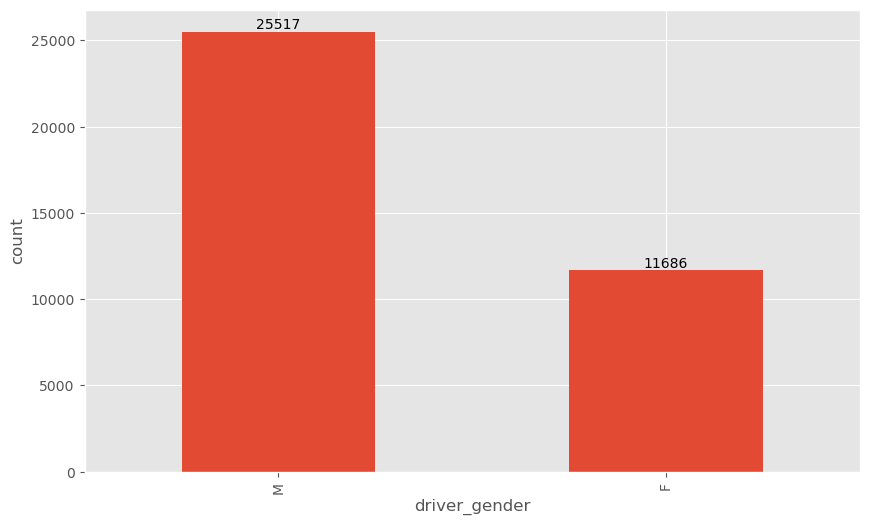

In [53]:
ax= vs.plot(kind = 'bar',ylabel='count',figsize=(10,6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.show()

Male were stopped twice of Female for speeding

## Violation & Race

In [14]:
df[df['violation']=='Speeding'].driver_race.value_counts()

driver_race
White       30186
Black        3658
Hispanic     2062
Asian        1173
Other         125
Name: count, dtype: int64

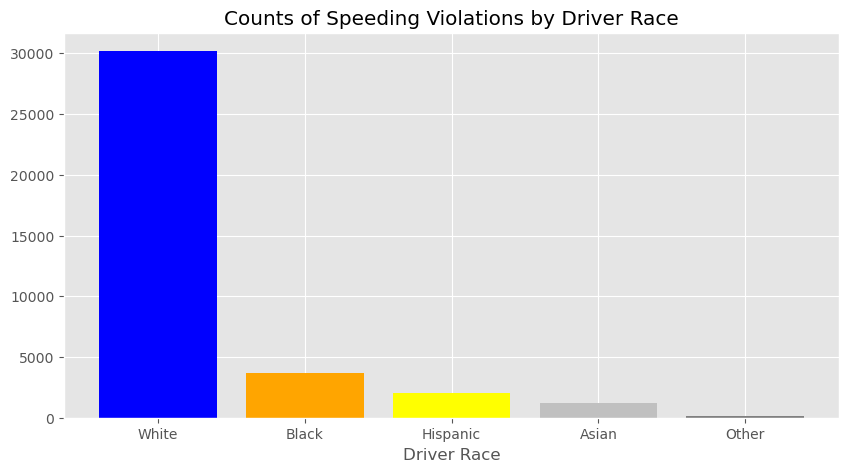

In [27]:
driver_race = ['White','Black','Hispanic','Asian','Other']
counts = [30186, 3658,2062,1173,125]
COLORS =['blue','orange','yellow','silver','grey']

plt.figure(figsize=(10,5))
plt.bar(driver_race,counts,color=COLORS)
plt.xlabel('Driver Race')
plt.title('Counts of Speeding Violations by Driver Race')

plt.show()

## Does gender affect who gets seached during a stop?

In [18]:
df.groupby('driver_gender').search_conducted.value_counts()

driver_gender  search_conducted
F              False               15944
               True                  366
M              False               43051
               True                 2113
Name: count, dtype: int64

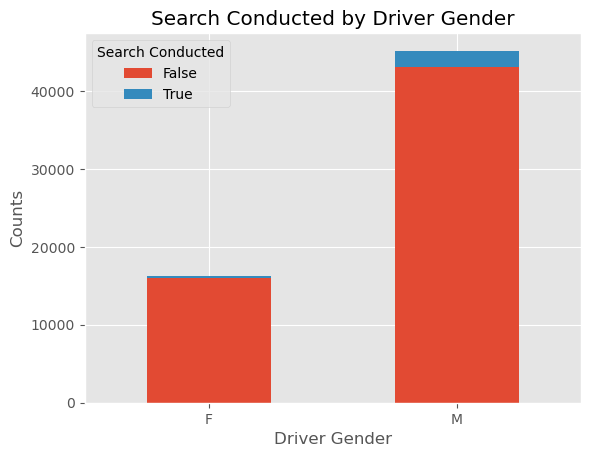

In [28]:

data = {'driver_gender': ['F', 'F', 'M', 'M'],
        'search_conducted': [False, True, False, True],
        'counts': [15944, 366, 43051, 2113]}

AA = pd.DataFrame(data)

# Plotting
AA.pivot_table(index='driver_gender', columns='search_conducted', values='counts', aggfunc='sum').plot(kind='bar', stacked=True)

# Labeling
plt.xlabel('Driver Gender')
plt.ylabel('Counts')
plt.title('Search Conducted by Driver Gender')
plt.legend(title='Search Conducted')
plt.xticks(rotation=0)

# Display plot
plt.show()


In [22]:
df.search_conducted.value_counts()


search_conducted
False    63056
True      2479
Name: count, dtype: int64

Search was conducted 2479 times. Out of which Male were searched 2113 times and Female were searched 366 times. It shows that 
Gender do effect search conducted.

### What is the mean stop_duration?

In [43]:
df.head()

stop_date stop_time driver_gender  driver_age_raw  driver_age driver_race  \
0   1/2/2005      1:55             M          1985.0        20.0       White   
1  1/18/2005      8:15             M          1965.0        40.0       White   
2  1/23/2005     23:15             M          1972.0        33.0       White   
3  2/20/2005     17:15             M          1986.0        19.0       White   
4  3/14/2005     10:00             F          1984.0        21.0       White   

      violation_raw violation  search_conducted   stop_outcome is_arrested  \
0          Speeding  Speeding             False       Citation       False   
1          Speeding  Speeding             False       Citation       False   
2          Speeding  Speeding             False       Citation       False   
3  Call for Service     Other             False  Arrest Driver        True   
4          Speeding  Speeding             False       Citation       False   

  stop_duration  drugs_related_stop  
0      0-15 Min               False  
1      0-15 Min               False  
2      0-15 Min               False  
3     16-30 Min               False  
4      0-15 Min               False

In [24]:
df['stop_duration'].dtypes

dtype('O')

In [25]:
df['stop_duration'].value_counts()

stop_duration
0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: count, dtype: int64

In [27]:
df['stop_duration']=df['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':30})

In [28]:
df

stop_date stop_time driver_gender  driver_age_raw  driver_age  \
0       1/2/2005      1:55             M          1985.0        20.0   
1      1/18/2005      8:15             M          1965.0        40.0   
2      1/23/2005     23:15             M          1972.0        33.0   
3      2/20/2005     17:15             M          1986.0        19.0   
4      3/14/2005     10:00             F          1984.0        21.0   
...          ...       ...           ...             ...         ...   
65530  12/6/2012     17:54             F          1987.0        25.0   
65531  12/6/2012     22:22             M          1954.0        58.0   
65532  12/6/2012     23:20             M          1985.0        27.0   
65533  12/7/2012      0:23           NaN             NaN         NaN   
65534  12/7/2012      0:30             F          1985.0        27.0   

      driver_race                   violation_raw  violation  \
0           White                        Speeding   Speeding   
1           White                        Speeding   Speeding   
2           White                        Speeding   Speeding   
3           White                Call for Service      Other   
4           White                        Speeding   Speeding   
...           ...                             ...        ...   
65530       White                        Speeding   Speeding   
65531       White                        Speeding   Speeding   
65532       Black  Equipment/Inspection Violation  Equipment   
65533         NaN                             NaN        NaN   
65534       White                        Speeding   Speeding   

       search_conducted   stop_outcome is_arrested  stop_duration  \
0                 False       Citation       False            7.5   
1                 False       Citation       False            7.5   
2                 False       Citation       False            7.5   
3                 False  Arrest Driver        True           23.0   
4                 False       Citation       False            7.5   
...                 ...            ...         ...            ...   
65530             False       Citation       False            7.5   
65531             False        Warning       False            7.5   
65532             False       Citation       False            7.5   
65533             False            NaN         NaN            NaN   
65534             False       Citation       False            7.5   

       drugs_related_stop  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
65530               False  
65531               False  
65532               False  
65533               False  
65534               False  

[65535 rows x 13 columns]

In [29]:
df['stop_duration'].mean()

11.355312815173894

### Analyze stop duration

Who were stopped most?

In [55]:
stop_duration_stats = df.groupby('stop_duration').agg({'driver_age':['mean','max','min','count']})
stop_duration_stats

driver_age                   
                    mean   max   min  count
stop_duration                              
0-15 Min       34.021884  88.0  15.0  47203
16-30 Min      34.120067  88.0  15.0  11377
2              52.000000  52.0  52.0      1
30+ Min        36.548448  86.0  15.0   2642

What were the outcome after stopping vehicle?

In [32]:
stop_outcome_distribution = df.groupby('stop_outcome').size().reset_index(name='Count')
stop_outcome_distribution

stop_outcome  Count
0     Arrest Driver   2009
1  Arrest Passenger    251
2          Citation  56564
3               N/D    423
4         No Action    339
5           Warning   1889

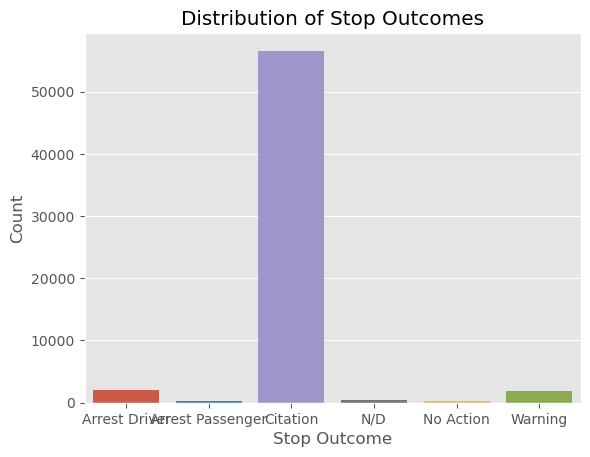

In [34]:
sns.barplot(x='stop_outcome', y='Count',data = stop_outcome_distribution)

plt.xlabel('Stop Outcome')
plt.ylabel('Count')
plt.title('Distribution of Stop Outcomes')

plt.show()

A criminal citation is a method of charging a person with committing a criminal offense without going through the standard formalities of arrest, fingerprinting, processing, taking an individual before a judge to be arraigned, and posting of bond. If a person receives a citation, instead of being arrested and sent to jail, the person receives a summons to report to a specific location at a later date to handle the charge(s)

### Compare the age distributions for each violation

In [36]:
g=df.groupby('driver_age')

In [37]:
g.violation.value_counts()

driver_age  violation          
15.0        Moving violation        4
            Speeding                1
16.0        Speeding               18
            Moving violation        6
            Registration/plates     5
                                   ..
85.0        Moving violation        1
86.0        Speeding                3
            Moving violation        2
            Other                   1
88.0        Speeding                2
Name: count, Length: 333, dtype: int64

In [35]:
df.groupby('violation').driver_age.describe()

count       mean        std   min   25%   50%   75%  \
violation                                                                    
Equipment             6507.0  31.682957  11.380671  16.0  23.0  28.0  39.0   
Moving violation     11876.0  36.736443  13.258350  15.0  25.0  35.0  47.0   
Other                 3477.0  40.362381  12.754423  16.0  30.0  41.0  50.0   
Registration/plates   2240.0  32.656696  11.150780  16.0  24.0  30.0  40.0   
Seat belt                3.0  30.333333  10.214369  23.0  24.5  26.0  34.0   
Speeding             37120.0  33.262581  12.615781  15.0  23.0  30.0  42.0   

                      max  
violation                  
Equipment            81.0  
Moving violation     86.0  
Other                86.0  
Registration/plates  74.0  
Seat belt            42.0  
Speeding             88.0

In [36]:
df['violation'].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

### Explore driver demographic

In [4]:

df

stop_date stop_time  country_name driver_gender  driver_age_raw  \
0       1/2/2005      1:55           NaN             M          1985.0   
1      1/18/2005      8:15           NaN             M          1965.0   
2      1/23/2005     23:15           NaN             M          1972.0   
3      2/20/2005     17:15           NaN             M          1986.0   
4      3/14/2005     10:00           NaN             F          1984.0   
...          ...       ...           ...           ...             ...   
65530  12/6/2012     17:54           NaN             F          1987.0   
65531  12/6/2012     22:22           NaN             M          1954.0   
65532  12/6/2012     23:20           NaN             M          1985.0   
65533  12/7/2012      0:23           NaN           NaN             NaN   
65534  12/7/2012      0:30           NaN             F          1985.0   

       driver_age driver_race                   violation_raw  violation  \
0            20.0       White                        Speeding   Speeding   
1            40.0       White                        Speeding   Speeding   
2            33.0       White                        Speeding   Speeding   
3            19.0       White                Call for Service      Other   
4            21.0       White                        Speeding   Speeding   
...           ...         ...                             ...        ...   
65530        25.0       White                        Speeding   Speeding   
65531        58.0       White                        Speeding   Speeding   
65532        27.0       Black  Equipment/Inspection Violation  Equipment   
65533         NaN         NaN                             NaN        NaN   
65534        27.0       White                        Speeding   Speeding   

       search_conducted search_type   stop_outcome is_arrested stop_duration  \
0                 False         NaN       Citation       False      0-15 Min   
1                 False         NaN       Citation       False      0-15 Min   
2                 False         NaN       Citation       False      0-15 Min   
3                 False         NaN  Arrest Driver        True     16-30 Min   
4                 False         NaN       Citation       False      0-15 Min   
...                 ...         ...            ...         ...           ...   
65530             False         NaN       Citation       False      0-15 Min   
65531             False         NaN        Warning       False      0-15 Min   
65532             False         NaN       Citation       False      0-15 Min   
65533             False         NaN            NaN         NaN           NaN   
65534             False         NaN       Citation       False      0-15 Min   

       drugs_related_stop  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
65530               False  
65531               False  
65532               False  
65533               False  
65534               False  

[65535 rows x 15 columns]

In [5]:
df1=df.groupby(['driver_gender','driver_race']).agg({'driver_age':['mean','median','count']})
df1

driver_age              
                                mean median  count
driver_gender driver_race                         
F             Asian        31.978082   29.0    365
              Black        31.091355   28.0   1631
              Hispanic     30.685149   28.0   1010
              Other        30.913043   26.0     23
              White        32.726408   29.0  13246
M             Asian        34.004728   31.0   1269
              Black        34.366808   32.0   6592
              Hispanic     32.291931   30.0   4573
              Other        35.390374   33.0    187
              White        35.239157   32.0  32326

### Search Conducted Analysis

In [39]:
# Search Conducted Analysis:

search_conducted_proportion = df['search_conducted'].value_counts(normalize=True)*100
search_conducted_proportion

search_conducted
False    96.217288
True      3.782712
Name: proportion, dtype: float64

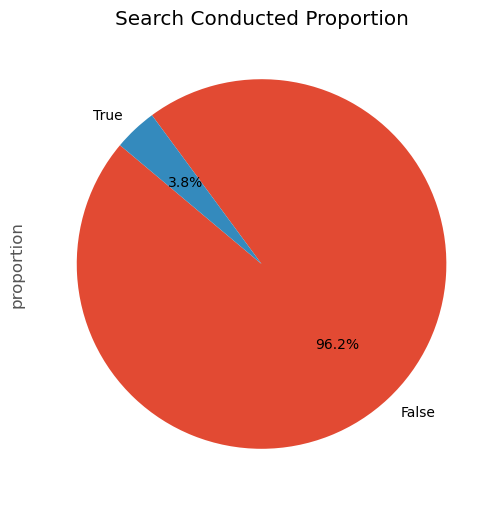

In [42]:
search_conducted_proportion.plot.pie(figsize=(10, 6), autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Search Conducted Proportion')

# Display plot
plt.show()

### drugs_related stop Analysis

In [46]:
# drugs_related stop Analysis
drugs_related_stop_frequency = df['drugs_related_stop'].value_counts()
drugs_related_stop_frequency

drugs_related_stop
False    65017
True       518
Name: count, dtype: int64

In [47]:
drs= df.groupby(['driver_gender','drugs_related_stop']).agg({'drugs_related_stop':['count']})
drs

drugs_related_stop
                                              count
driver_gender drugs_related_stop                   
F             False                           16254
              True                               56
M             False                           44702
              True                              462

In [14]:
df['is_arrested'].value_counts()

is_arrested
False    59215
True      2260
Name: count, dtype: int64

In [15]:
drs= df.groupby(['driver_gender','is_arrested']).agg({'is_arrested':['count']})
drs

is_arrested
                                count
driver_gender is_arrested            
F             False             15846
              True                464
M             False             43368
              True               1796